In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

In [4]:
df=pd.read_csv("Advertising.csv")

In [10]:
df.sample(15)


,Unnamed: 0,TV,Radio,Newspaper,Sales
157,158,149.8,1.3,24.3,10.1
35,36,290.7,4.1,8.5,12.8
86,87,76.3,27.5,16.0,12.0
147,148,243.2,49.0,44.3,25.4
38,39,43.1,26.7,35.1,10.1
168,169,215.4,23.6,57.6,17.1
143,144,104.6,5.7,34.4,10.4
9,10,199.8,2.6,21.2,10.6
141,142,193.7,35.4,75.6,19.2
73,74,129.4,5.7,31.3,11.0


In [18]:
df.isnull().sum()

Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Radio      200 non-null    float64
 1   Newspaper  200 non-null    float64
 2   Sales      200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [20]:
df.shape

(200, 3)

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe()

,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000
mean,23.264000,30.554000,14.022500
std,14.846809,21.778621,5.217457
min,0.000000,0.300000,1.600000
25%,9.975000,12.750000,10.375000
50%,22.900000,25.750000,12.900000
75%,36.525000,45.100000,17.400000
max,49.600000,114.000000,27.000000


In [23]:
df.head()

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,9.3
3,41.3,58.5,18.5
4,10.8,58.4,12.9


In [24]:
df.tail()

,Radio,Newspaper,Sales
195,3.7,13.8,7.6
196,4.9,8.1,9.7
197,9.3,6.4,12.8
198,42.0,66.2,25.5
199,8.6,8.7,13.4


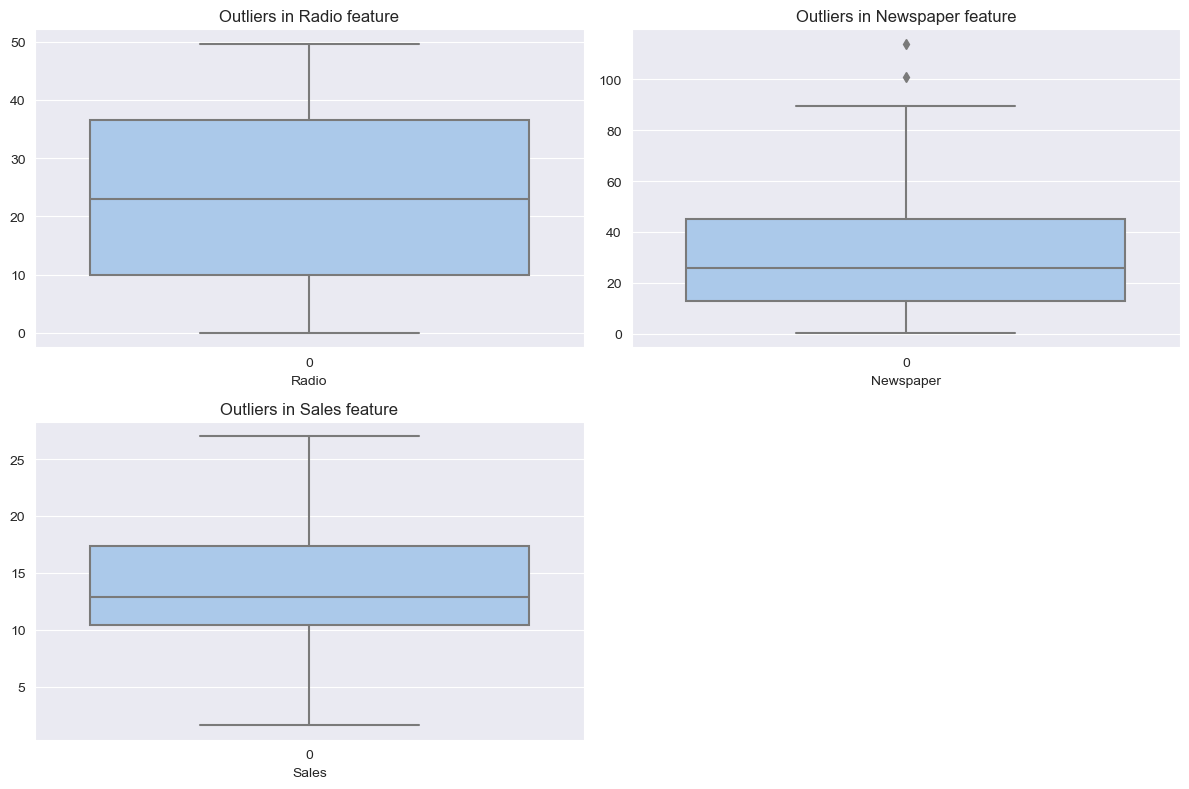

In [36]:
plt.figure(figsize=(12, 8))

columns = { 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot )
    sns.boxplot(data=df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()


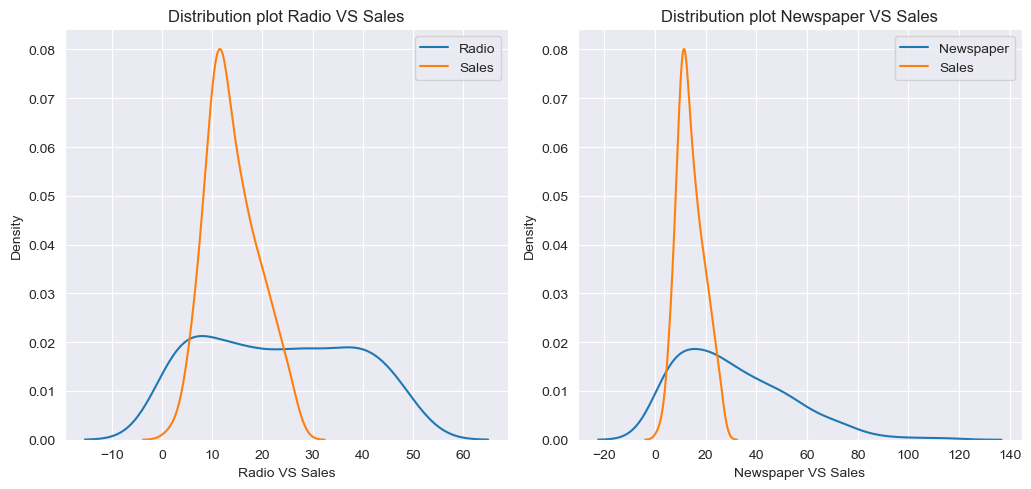

In [35]:
plt.figure(figsize=(15, 5))

columns = { 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.distplot(x=df[col_name],hist=False, label= col_name)
    sns.distplot(x=df["Sales"],hist = False,label= "Sales")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Distribution plot {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


In [37]:
df.corr()

,Radio,Newspaper,Sales
Radio,1.000000,0.354104,0.576223
Newspaper,0.354104,1.000000,0.228299
Sales,0.576223,0.228299,1.000000


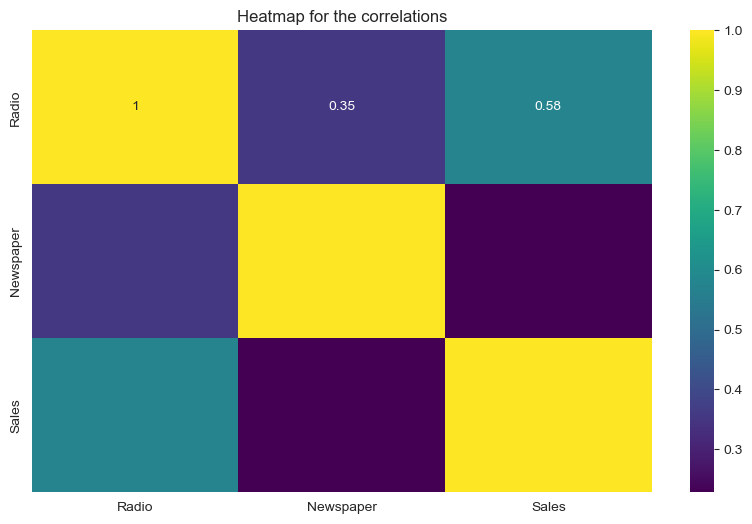

In [38]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Heatmap for the correlations")
plt.show()


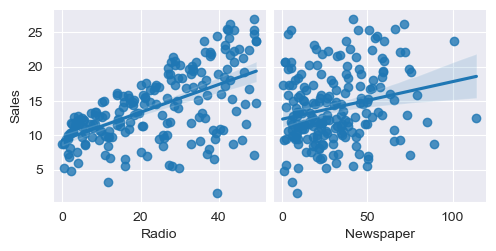

In [40]:
sns.pairplot(data = df,x_vars=[ "Radio", "Newspaper"], y_vars="Sales", kind="reg",palette="pastel")
plt.show()

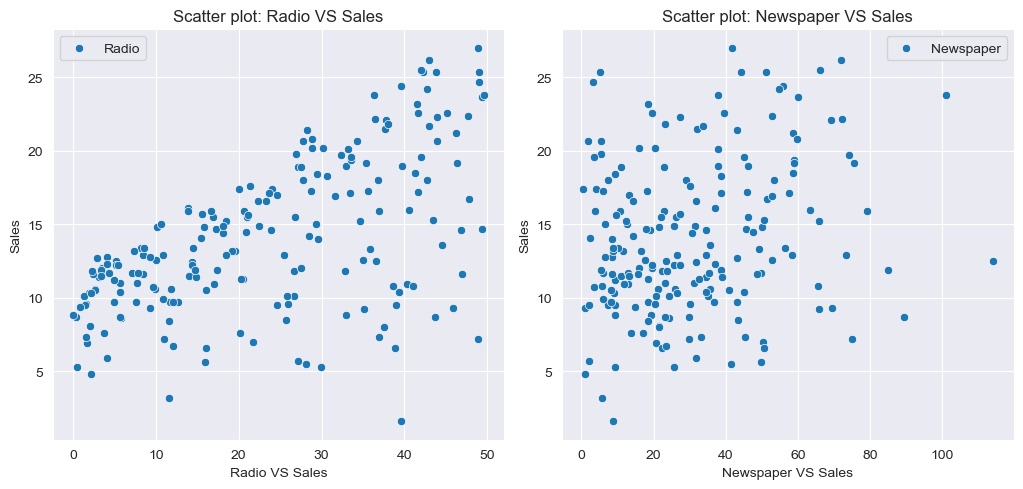

In [42]:
plt.figure(figsize=(15, 5))

columns = { 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=df[col_name],y=df["Sales"], label= col_name,palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()


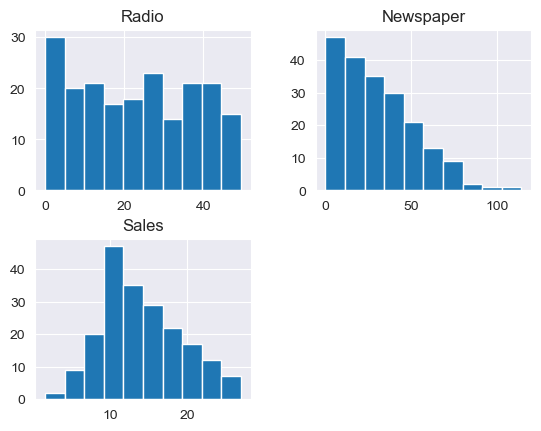

In [44]:
df.hist()
plt.show()

In [45]:
df.head()

,Radio,Newspaper,Sales
0,37.8,69.2,22.1
1,39.3,45.1,10.4
2,45.9,69.3,9.3
3,41.3,58.5,18.5
4,10.8,58.4,12.9


In [47]:
X = df.drop(columns="Sales",axis=1)


In [48]:
y=df["Sales"]

In [49]:
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

le = LabelEncoder()
y= le.fit_transform(y)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [52]:
scaler = MinMaxScaler()
scaler.fit(X_train,y_train)

MinMaxScaler()

In [53]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso

models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso())
]

Linear Regression
Mean Squared Error: 952.3418663237741
R2 Score: 0.24545913506640538
Cross-Validation R2: 0.1495011542951618


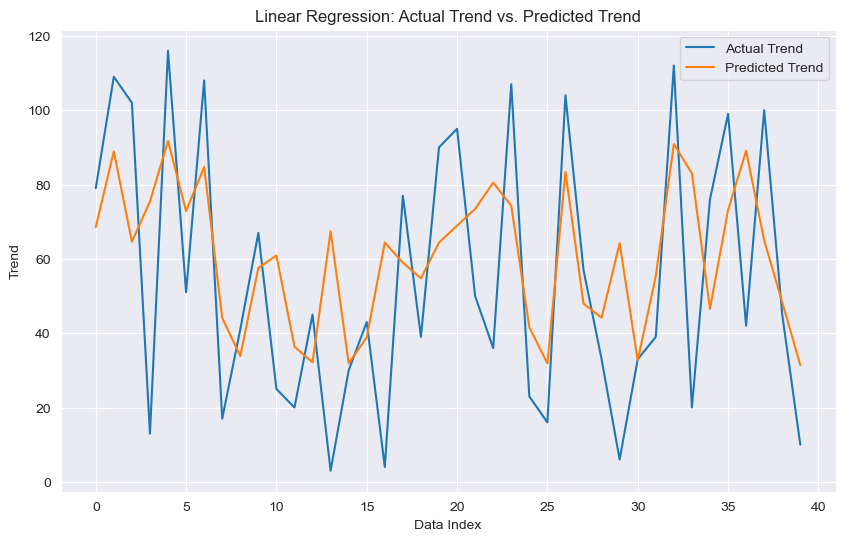


Ridge Regression
Mean Squared Error: 947.6414593149653
R2 Score: 0.2491832695346895
Cross-Validation R2: 0.1493261293729486


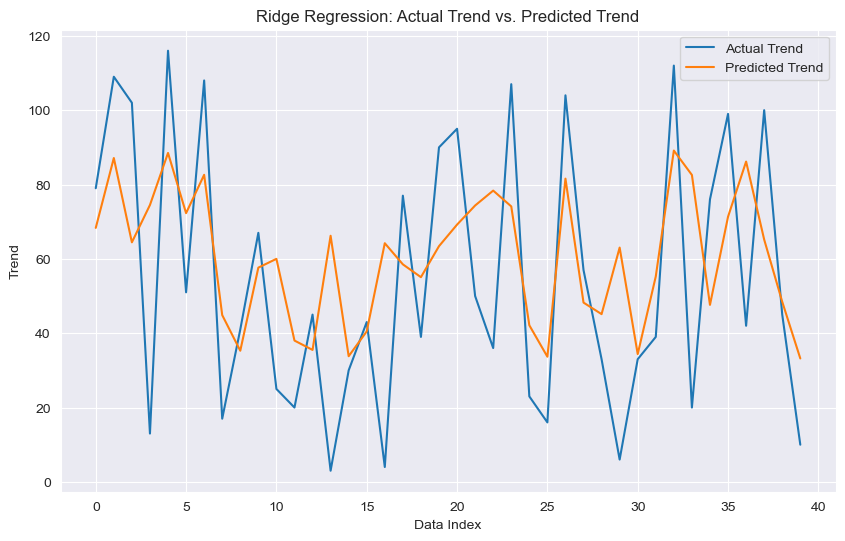


Lasso Regression
Mean Squared Error: 955.0250066914617
R2 Score: 0.24333328181416047
Cross-Validation R2: 0.14466039842304557


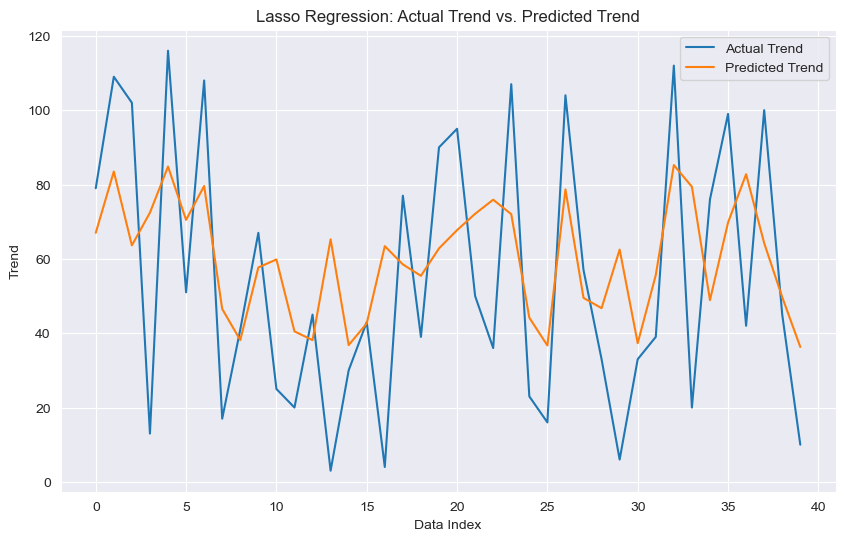

In [55]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

for name, model in models:
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    print("{}".format(name))
    print("Mean Squared Error: {}".format(mse))
    print("R2 Score: {}".format(r2))
    print("Cross-Validation R2: {}".format(cv_scores.mean()))
    
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    print()   

In [56]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [59]:
radio = float(input("Enter the Radio value: "))
news = float(input("Enter the Newspaper value: "))

new_data = pd.DataFrame({
    "Radio": [radio],
    "Newspaper": [news]
})

new_pred_scaled = scaler.transform(new_data)
print("-------------------------------------")
new_pred = lr.predict(new_pred_scaled)
print("Predicted Sales : {}".format(abs(new_pred)))


Enter the Radio value:  27
Enter the Newspaper value:  16


-------------------------------------
Predicted Sales : [30.55011417]
